In [2]:
import pandas as pd
import numpy as np
import math
import time

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
"""numbers = [1, 2, 3]
characters = ['x', 'y', 'z']
for num in numbers:
  for char in characters:
    print(num, char)
"""

"numbers = [1, 2, 3]\ncharacters = ['x', 'y', 'z']\nfor num in numbers:\n  for char in characters:\n    print(num, char)\n"

In [5]:
trsn_df = pd.read_excel('QVI_transaction_data.xlsx')
bhvr_df = pd.read_csv('QVI_purchase_behaviour.csv')

In [6]:
trsn = trsn_df.copy()

# Find and remove duplicates

In [7]:
trsn[trsn.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [8]:
trsn[trsn['TXN_ID'] == 108462]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124844,43374,107,107024,108462,18,Cheetos Chs & Bacon Balls 190g,2,6.6
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [9]:
to_remove = list(trsn[trsn.duplicated()].index)
for i in to_remove:
  trsn = trsn.drop(i)

trsn = trsn.reset_index(drop=True)

# Show total number of transactions for each store





In [10]:
trsn.groupby('STORE_NBR').count()

,DATE,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
STORE_NBR,,,,,,,
1,573,573,573,573,573,573,573
2,506,506,506,506,506,506,506
3,1502,1502,1502,1502,1502,1502,1502
4,1678,1678,1678,1678,1678,1678,1678
5,1361,1361,1361,1361,1361,1361,1361
...,...,...,...,...,...,...,...
268,546,546,546,546,546,546,546
269,1607,1607,1607,1607,1607,1607,1607
270,1630,1630,1630,1630,1630,1630,1630


# Find the total sales for each product and sort in descending order

In [11]:
trsn.groupby('PROD_NAME').sum()['TOT_SALES'].sort_values(ascending=False)

PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
                                             ...   
WW Crinkle Cut      Chicken 175g             4702.2
Sunbites Whlegrn    Crisps Frch/Onin 90g     4600.2
WW Crinkle Cut      Original 175g            4532.2
Woolworths Mild     Salsa 300g               4234.5
Woolworths Medium   Salsa 300g               4050.0
Name: TOT_SALES, Length: 114, dtype: float64

# Find the price/100g for all products

In [12]:
# Finding weight in grams using regex
import re
# https://www.w3schools.com/python/python_regex.asp
trsn['grams'] = 0
for i in range(len(trsn)):
  weight = re.findall(r'\d+', trsn.at[i, 'PROD_NAME'])[0]
  trsn.at[i, 'grams'] = int(weight)

In [13]:
# Finding price/100g
trsn['ppu'] = trsn['TOT_SALES'] / trsn['PROD_QTY'] # price per unit
trsn['price/100g'] = (trsn['ppu'] / trsn['grams']) * 100
trsn

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,grams,ppu,price/100g
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,3.00,1.714286
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,2.10,1.200000
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,1.45,0.852941
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,3.00,1.714286
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,4.60,3.066667
...,...,...,...,...,...,...,...,...,...,...,...
264830,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,5.40,3.085714
264831,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,4.40,2.514286
264832,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,4.40,2.588235
264833,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,3.90,2.600000


# Give the price/100g for 'Red Rock Deli Thai Chilli&Lime 150g'

In [14]:
trsn[trsn['PROD_NAME'] == 'Red Rock Deli Thai  Chilli&Lime 150g']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,grams,ppu,price/100g
28,43327,41,41486,38472,13,Red Rock Deli Thai Chilli&Lime 150g,1,2.7,150,2.7,1.8
297,43288,5,5026,4524,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4,150,2.7,1.8
674,43396,33,33005,29466,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4,150,2.7,1.8
679,43322,33,33019,29542,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4,150,2.7,1.8
855,43467,43,43147,39605,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4,150,2.7,1.8
...,...,...,...,...,...,...,...,...,...,...,...
264245,43431,247,247065,248974,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4,150,2.7,1.8
264286,43429,248,248085,250293,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4,150,2.7,1.8
264453,43401,255,255196,254766,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4,150,2.7,1.8
264748,43448,268,268270,264689,13,Red Rock Deli Thai Chilli&Lime 150g,1,2.7,150,2.7,1.8


# Using the first word in PROD_NAME, create a new column for the brand name
### Make sure there are no same brands with different names


1.   Dorito -> Doritos
2.   Grain -> GrnWves
3.   Infzns -> Infuzions
4.   Natural -> NCC
5.   Red -> RRD
6.   Smith -> Smiths
7.   Snbts -> Sunbites
8.   Woolworths -> WW



In [15]:
trsn['brand'] = ''
for i in range(len(trsn)):
  trsn.at[i, 'brand'] = trsn.at[i, 'PROD_NAME'].split()[0]
  if trsn.at[i, 'brand'] == 'Dorito':
    trsn.at[i, 'brand'] = 'Doritos'
  elif trsn.at[i, 'brand'] == 'Grain':
    trsn.at[i, 'brand'] = 'GrnWves'
  elif trsn.at[i, 'brand'] == 'Infzns':
    trsn.at[i, 'brand'] = 'Infuzions'
  elif trsn.at[i, 'brand'] == 'Natural':
    trsn.at[i, 'brand'] = 'NCC'
  elif trsn.at[i, 'brand'] == 'Red':
    trsn.at[i, 'brand'] = 'RRD'
  elif trsn.at[i, 'brand'] == 'Smith':
    trsn.at[i, 'brand'] = 'Smiths'
  elif trsn.at[i, 'brand'] == 'Snbts':
    trsn.at[i, 'brand'] = 'Sunbites'
  elif trsn.at[i, 'brand'] == 'Woolworths':
    trsn.at[i, 'brand'] = 'WW'

sorted(trsn['brand'].unique())

['Burger',
 'CCs',
 'Cheetos',
 'Cheezels',
 'Cobs',
 'Doritos',
 'French',
 'GrnWves',
 'Infuzions',
 'Kettle',
 'NCC',
 'Old',
 'Pringles',
 'RRD',
 'Smiths',
 'Sunbites',
 'Thins',
 'Tostitos',
 'Twisties',
 'Tyrrells',
 'WW']

In [16]:
len(sorted(trsn['brand'].unique()))

21

# Create a plot to compare the sales of each brand

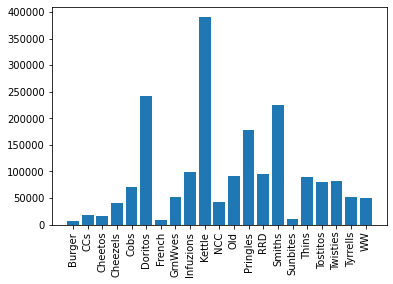

In [17]:
brand_sales = trsn.groupby('brand').sum()
plt.bar(brand_sales.index, brand_sales['TOT_SALES'])
plt.xticks(rotation = 90)
plt.show()

# Merge bhvr and trsn



In [18]:
df = pd.merge(bhvr_df, trsn, on = 'LYLTY_CARD_NBR')
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,grams,ppu,price/100g,brand
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,3.0,1.714286,NCC
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,2.7,1.800000,RRD
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,3.6,1.714286,GrnWves
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,3.0,1.714286,NCC
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,1.9,1.187500,WW


# Extra

In [25]:
brand_list = []
i = 0
for brand in df['brand']:
  brand_list.append(i)
  i += 1

df['brand'] = brand_list

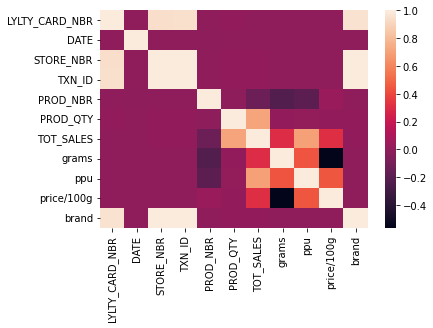

In [26]:
sns.heatmap(df.corr())